# Team Space X Analysis Notebook.


## ZAMFARA STATE HEALTH CARE FACILITIES ACCESSIBILITY AND ASSESSMENT
Zamfara State is ranked as the poorest state in term of health care in Nigeria, according to BHCM report. Based on this information, we decided to explore the relationship between different variables that contibutes to health accessibility using both spatial and non-spatial data.

Aims of this project
* What is the pouplation of people within 500m radius of the existing health care facilities
* To identify the most suitable area to site health facilities.
* To identify areas that have low access to health facilities
* To Determine the optimal suitable location that needs earth facilities based on the people need.

To achieve the aims and objectives of this project, Data anlysis and Geospatial Analysis Techniques will be employed in this project

##  Data Analysis
* To know the total number of health care facilities in the different wards across the state
* To known the count of eah categories of health Facilities



## Geospatial Analysis
* Use facebook movemnt data to understand the mobility of peploe within the state
* Validate the Health Facility data and eliminate every point that does not exist.
* Create a buffer of 500m around the health facilities, to determine hwo many people within the buffered area has acess to the health facilities.
* Identify the constraints which are; Distance to waterways, Distance to water bodies, distance to existing health facilities, all this layers will be merged together as one single vector file.
* Identify the most important factors; distance to road network, residential area. Residential area that is within (intercept) 100m distance to a road network are suitable for siting a health facility.
* To identify area that have low access to health facilities, the constraint vector will be used to erase the residential polygon, the left over of the erased file shows location that have low access to health care, the polygon was used to run zonal states which shows the total number of people that have low access to health care within the area.
* Use the overlay function in geopandas to erase the factors polygon using the merge constaiant layer, where ever the factors and the contraint overlay will be erased
* The final result is the suitable area to site an health care
* To identify the optimum location, population is a very important factors, because health centers are built for the use of people.

In [ ]:
# Install all the required libraries that are not inbuilt into the ArcGIS notebook
!pip install geopandas
!pip install rasterio
!pip install matplotlib
!pip install seaborn

In [2]:
# import all the neccessary libary for Data Analysis and Geospatial analysis
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import rasterio
import matplotlib.pyplot as plt
import seaborn as sns
import fiona
from rasterio import mask


from arcgis.gis import GIS
from datetime import datetime as dt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data Analysis

In [3]:
# location of folder where all files are stored
location = r"/arcgis/home/"

# create a function that loads geospatial dataset uisng geopadas
def load_file(file_name, location):
    """This function loads Geospatial dataset
    File_name: name of the geospatial data with the extension
    location: location of the file on the pc
    """
    file = gpd.read_file(os.path.join(location,file_name))
    return file

In [4]:
# load the existing health facilities dataset
health_facilities = load_file("health_facilities.geojson",location)
health_facilities.head()

,id,name,global_id,alternate_name,functional_status,type,ward_code,category,timestamp,accessibility,lga_name,lga_code,state_code,state_name,ward_name,geometry
0,25725,Makakari Dispensary,3b8d46f1-5e68-40ab-a1ca-e4ccbd569b74,None,Functional,Primary,80102,Dispensary,2019-11-15 17:34:16,None,Anka,801,ZA,Zamfara,Bagega,POINT (5.89854 11.92152)
1,25730,Kasunka Dispensary,8e696460-7028-4a16-add7-9c06fbebc41c,None,Unknown,Primary,80102,Dispensary,2019-11-15 17:34:16,None,Anka,801,ZA,Zamfara,Bagega,POINT (5.91389 11.89662)
2,25737,Tungar Kudaku Dispensary,d3eb4731-02f3-4278-89c8-a10dd37a7d11,None,Unknown,Primary,80102,Dispensary,2019-11-15 17:34:16,None,Anka,801,ZA,Zamfara,Bagega,POINT (5.96934 11.94378)
3,25748,Kawaye Dispensary,fbe75e87-5c78-42ff-a395-15105f93fb1c,None,Functional,Primary,80102,Dispensary,2019-11-15 17:34:16,None,Anka,801,ZA,Zamfara,Bagega,POINT (6.03265 11.82419)
4,25766,Duza Primary Health Center,bbeba45e-cb5d-49b3-8cc8-dda7eb51bc17,None,Unknown,Primary,80102,Primary Health Center,2018-12-18 10:21:02,None,Anka,801,ZA,Zamfara,Bagega,POINT (6.07949 11.89934)


In [5]:
# Find the total number of existing healthcare facilities
len(health_facilities)

916

In [6]:
health_facilities.columns

Index(['id', 'name', 'global_id', 'alternate_name', 'functional_status',
       'type', 'ward_code', 'category', 'timestamp', 'accessibility',
       'lga_name', 'lga_code', 'state_code', 'state_name', 'ward_name',
       'geometry'],
      dtype='object')

In [7]:
# Find the categories of healthcare facilities available
health_facilities.category.value_counts()

Dispensary                     508
Primary Health Center          360
General Hospital                18
Private Non Profit              14
Educational Clinic               7
Maternity Home                   3
Specialist Hospital              2
Comprehensive Health Center      1
Federal Staff Clinic             1
Federal Medical Center           1
Medical Center                   1
Name: category, dtype: int64

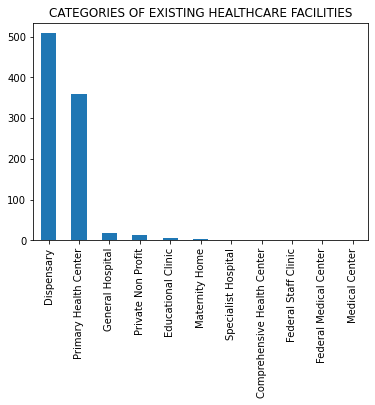

In [8]:
#visualize the categories by frequency
health_facilities.category.value_counts().plot(kind="bar");
plt.title("CATEGORIES OF EXISTING HEALTHCARE FACILITIES")
plt.savefig(os.path.join(location,"CATEGORIES OF EXISTING HEALTHCARE FACILITIES"))

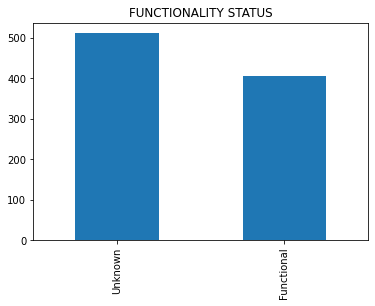

In [9]:
health_facilities.functional_status.value_counts().plot(kind="bar");
plt.title("FUNCTIONALITY STATUS")
plt.savefig(os.path.join(location,"FUNCTIONALITY STATUS"))

In [10]:
# total LGA in the state
print(f"The toal number of LGA in Zamfara is {health_facilities.lga_name.nunique()}")

# total wads in the state
print(f"The toal number of ward in Zamfara is {health_facilities.ward_name.nunique()}")

The toal number of LGA in Zamfara is 14
The toal number of ward in Zamfara is 139


In [11]:
## # 10 wards wth the higest number of hospitals
health_facilities.ward_name.value_counts().head(10)

Galadima            31
Tudun Wada          17
Furfuri Kwaikwai    16
Maru                15
Magaji              14
Tsafe Central       14
Bela Rawaiya        14
Bungudu             13
Gada Karakai        13
Kanoma              13
Name: ward_name, dtype: int64

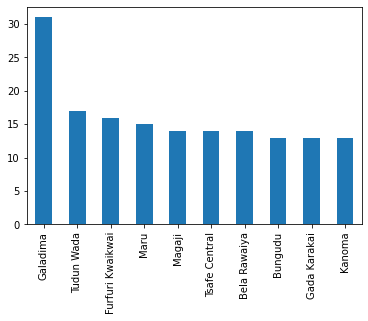

In [12]:
health_facilities.ward_name.value_counts().head(10).plot(kind='bar');

In [13]:
# 10 wards wth the least number of hospitals
health_facilities.ward_name.value_counts().tail(10)

Tsibiri               2
Shanawa               2
Gusari-Garbadu        2
Rini                  2
Damri                 2
Ruwan Jema            2
Ruwan Bore-Mirkidi    2
Yargeda               2
Dakko                 2
Dauki                 2
Name: ward_name, dtype: int64

In [14]:
## Health facilities per LGA
health_facilities.lga_name.value_counts()

Gusau                  103
Bungudu                 99
Maru                    85
Kaura Namoda            74
Tsafe                   70
Zurmi                   68
Anka                    62
Talata Mafara           62
Birnin Magaji-Kiyaw     55
Shinkafi                55
Maradun                 52
Gummi                   51
Bukkuyum                47
Bakura                  33
Name: lga_name, dtype: int64

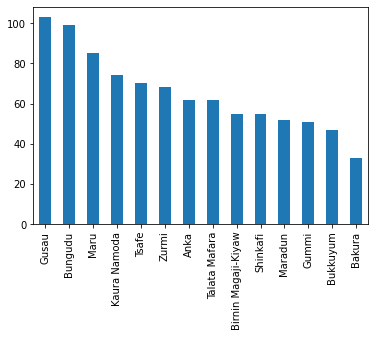

In [15]:
health_facilities.lga_name.value_counts().plot(kind="bar");

## Geospatial Analysis

### Using Facebook Mobility Data To understand Human Movement in Zamfara State

<Item title:"nigeria_movement_range" type:Feature Layer Collection owner:chinazo9>
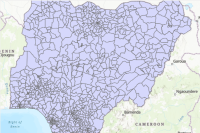

In [16]:
# instantiate the gis object
gis = GIS('home')
# Item Added From Toolbar
# Title: nigeria_movement_range | Type: Feature Service | Owner: chinazo9
nga_movement = gis.content.get("6efec7333f5f4f7ab10aa3461da241c2")
nga_movement

In [17]:
# read the facebook movement layer as geodataframe
nga_movement_layer = nga_movement.layers[0]
nga_movement_gdf = nga_movement_layer.query().sdf
nga_movement_gdf.head()

,OBJECTID_1,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,...,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_rela,all_day_ratio_single_tile_users,baseline_name,baseline_type,Shape__Area,Shape__Length,SHAPE
0,1,NGA,Nigeria,NGA.1_1,Abia,,NGA.1.1_1,Aba North,,,...,GADM,NGA.1.1_1,Aba North,-0.14142,0.18875,full_february,DAY_OF_WEEK,0.001471,0.28777,"{""rings"": [[[7.37960720051194, 5.0596637728648..."
1,2,NGA,Nigeria,NGA.1_1,Abia,,NGA.1.1_1,Aba North,,,...,GADM,NGA.1.1_1,Aba North,-0.06848,0.24061,full_february,DAY_OF_WEEK,0.001471,0.28777,"{""rings"": [[[7.37960720051194, 5.0596637728648..."
2,3,NGA,Nigeria,NGA.1_1,Abia,,NGA.1.1_1,Aba North,,,...,GADM,NGA.1.1_1,Aba North,-0.08961,0.19216,full_february,DAY_OF_WEEK,0.001471,0.28777,"{""rings"": [[[7.37960720051194, 5.0596637728648..."
3,4,NGA,Nigeria,NGA.1_1,Abia,,NGA.1.1_1,Aba North,,,...,GADM,NGA.1.1_1,Aba North,-0.03200,0.14457,full_february,DAY_OF_WEEK,0.001471,0.28777,"{""rings"": [[[7.37960720051194, 5.0596637728648..."
4,5,NGA,Nigeria,NGA.1_1,Abia,,NGA.1.1_1,Aba North,,,...,GADM,NGA.1.1_1,Aba North,-0.15844,0.14010,full_february,DAY_OF_WEEK,0.001471,0.28777,"{""rings"": [[[7.37960720051194, 5.0596637728648..."


In [18]:
nga_movement_gdf.columns

Index(['OBJECTID_1', 'GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'NL_NAME_1',
       'GID_2', 'NAME_2', 'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2',
       'CC_2', 'HASC_2', 'OBJECTID', 'ds', 'country', 'polygon_source',
       'polygon_id', 'polygon_name', 'all_day_bing_tiles_visited_rela',
       'all_day_ratio_single_tile_users', 'baseline_name', 'baseline_type',
       'Shape__Area', 'Shape__Length', 'SHAPE'],
      dtype='object')

In [19]:
# Extract the usefull columns for this activity
nga_movement_gdf = nga_movement_gdf[['GID_1','NAME_1','ds', 'polygon_id', 'polygon_name',
                'all_day_bing_tiles_visited_rela', 'all_day_ratio_single_tile_users']]
nga_movement_gdf.head()

,GID_1,NAME_1,ds,polygon_id,polygon_name,all_day_bing_tiles_visited_rela,all_day_ratio_single_tile_users
0,NGA.1_1,Abia,2021-01-01,NGA.1.1_1,Aba North,-0.14142,0.18875
1,NGA.1_1,Abia,2021-01-02,NGA.1.1_1,Aba North,-0.06848,0.24061
2,NGA.1_1,Abia,2021-01-03,NGA.1.1_1,Aba North,-0.08961,0.19216
3,NGA.1_1,Abia,2021-01-04,NGA.1.1_1,Aba North,-0.03200,0.14457
4,NGA.1_1,Abia,2021-01-05,NGA.1.1_1,Aba North,-0.15844,0.14010


In [20]:
# extract Zamfara  movement range from the whole dataset
zamfara_movement = nga_movement_gdf[nga_movement_gdf["NAME_1"] == "Zamfara"]
# drop NANs
zamfara_movement = zamfara_movement.dropna(subset=["all_day_ratio_single_tile_users"])
zamfara_movement.head()

,GID_1,NAME_1,ds,polygon_id,polygon_name,all_day_bing_tiles_visited_rela,all_day_ratio_single_tile_users
64885,NGA.37_1,Zamfara,2021-01-01,NGA.37.7_1,Gusau,0.05220,0.07259
64886,NGA.37_1,Zamfara,2021-01-02,NGA.37.7_1,Gusau,0.09741,0.08472
64887,NGA.37_1,Zamfara,2021-01-03,NGA.37.7_1,Gusau,0.06082,0.08899
64888,NGA.37_1,Zamfara,2021-01-04,NGA.37.7_1,Gusau,0.03047,0.08117
64889,NGA.37_1,Zamfara,2021-01-05,NGA.37.7_1,Gusau,0.02426,0.08885


In [21]:
zamfara_movement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 64885 to 65361
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   GID_1                            477 non-null    object        
 1   NAME_1                           477 non-null    object        
 2   ds                               477 non-null    datetime64[ns]
 3   polygon_id                       477 non-null    object        
 4   polygon_name                     477 non-null    object        
 5   all_day_bing_tiles_visited_rela  477 non-null    float64       
 6   all_day_ratio_single_tile_users  477 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 29.8+ KB


In [22]:
# How many LGA does the data covered
zamfara_movement.polygon_name.value_counts()

Gusau    477
Name: polygon_name, dtype: int64

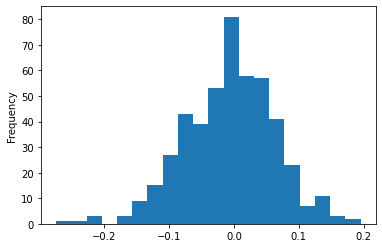

In [23]:
zamfara_movement['all_day_bing_tiles_visited_rela'].plot(kind='hist', bins=20);

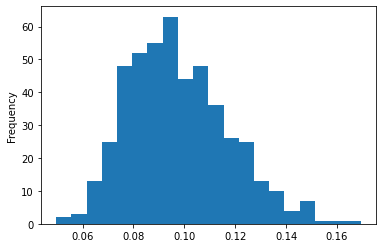

In [24]:
zamfara_movement['all_day_ratio_single_tile_users'].plot(kind='hist', bins=20);

In [25]:
# convert dates of week days
zamfara_movement['dow'] = zamfara_movement.ds.dt.day_name()
zamfara_movement

,GID_1,NAME_1,ds,polygon_id,polygon_name,all_day_bing_tiles_visited_rela,all_day_ratio_single_tile_users,dow
64885,NGA.37_1,Zamfara,2021-01-01,NGA.37.7_1,Gusau,0.05220,0.07259,Friday
64886,NGA.37_1,Zamfara,2021-01-02,NGA.37.7_1,Gusau,0.09741,0.08472,Saturday
64887,NGA.37_1,Zamfara,2021-01-03,NGA.37.7_1,Gusau,0.06082,0.08899,Sunday
64888,NGA.37_1,Zamfara,2021-01-04,NGA.37.7_1,Gusau,0.03047,0.08117,Monday
64889,NGA.37_1,Zamfara,2021-01-05,NGA.37.7_1,Gusau,0.02426,0.08885,Tuesday
...,...,...,...,...,...,...,...,...
65357,NGA.37_1,Zamfara,2022-05-18,NGA.37.7_1,Gusau,-0.08280,0.13573,Wednesday
65358,NGA.37_1,Zamfara,2022-05-19,NGA.37.7_1,Gusau,-0.06882,0.09856,Thursday
65359,NGA.37_1,Zamfara,2022-05-20,NGA.37.7_1,Gusau,-0.11871,0.11347,Friday
65360,NGA.37_1,Zamfara,2022-05-21,NGA.37.7_1,Gusau,0.14934,0.10880,Saturday


In [26]:
# compute average mobility of each day of the week
zam_avg_movement = zamfara_movement.groupby(["dow"], as_index=False)\
                .agg(avg_mobility_change_per_day=('all_day_bing_tiles_visited_rela',np.mean))
zam_avg_movement

,dow,avg_mobility_change_per_day
0,Friday,-0.026765
1,Monday,-0.004304
2,Saturday,0.011866
3,Sunday,0.025090
4,Thursday,-0.013281
5,Tuesday,-0.021511
6,Wednesday,-0.015714


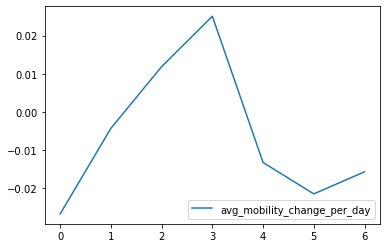

In [27]:
zam_avg_movement.plot(kind="line");

In [28]:
# compute average mobility of each day of the week
zam_avg_all_day_ratio = zamfara_movement.groupby(["dow"], as_index=False)\
                .agg(avg_mobility_change_per_day=('all_day_ratio_single_tile_users',np.mean))
zam_avg_all_day_ratio 

,dow,avg_mobility_change_per_day
0,Friday,0.090409
1,Monday,0.089677
2,Saturday,0.105253
3,Sunday,0.116360
4,Thursday,0.095154
5,Tuesday,0.093949
6,Wednesday,0.092233


<AxesSubplot:>

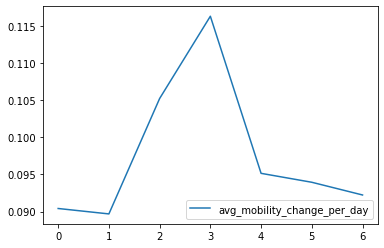

In [29]:
zam_avg_all_day_ratio.plot()

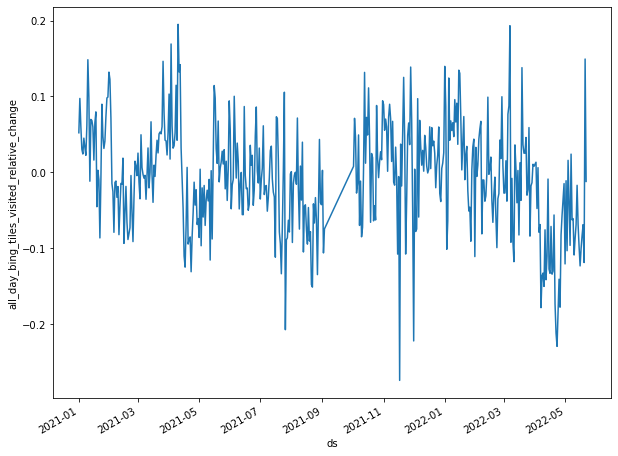

In [30]:
fig = plt.figure(figsize=(10, 8))
zamfara_movement.set_index("ds")["all_day_bing_tiles_visited_rela"].plot()
plt.xlabel("ds")
plt.ylabel("all_day_bing_tiles_visited_relative_change")
plt.show()

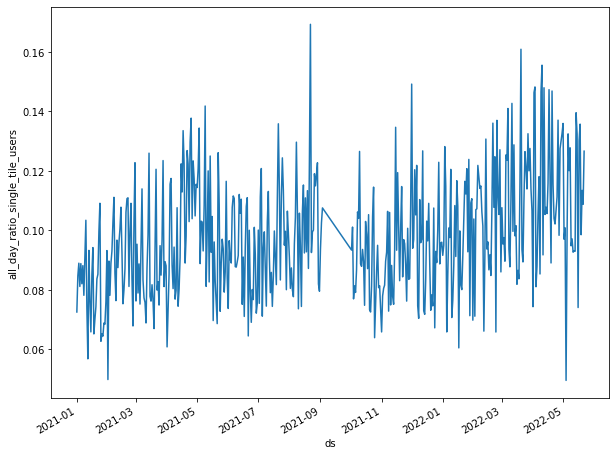

In [31]:
fig = plt.figure(figsize=(10, 8))
zamfara_movement.set_index("ds")["all_day_ratio_single_tile_users"].plot()
plt.xlabel("ds")
plt.ylabel("all_day_ratio_single_tile_users")
plt.show()

From the analysis above, we find out that both the average movemnet and the average mobility change per day index is very low in Zamfara state
which denote low movement range int he states.

### Health Facilitites Accessibilty

In [32]:
# check the spatial reference of the health facility point layer
print(health_facilities.crs)

epsg:4326


Reproject the health facility point CRS from WGS84 to UTM. 
This is needed whenever one is doing any GIS analysis that involves distance, to get the accurate distnace the data needs to be reprojected to it's local datum.

In [33]:
# reproject the health facility point CRS from WGS84 to UTM
reproj_facilities = health_facilities.to_crs(epsg=32632)
print(reproj_facilities.crs)

EPSG:32632


EPSG:32632


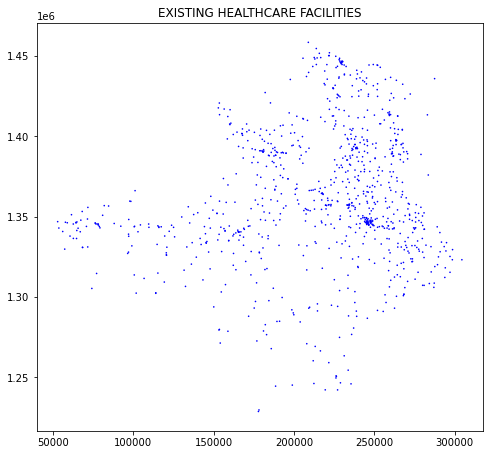

In [34]:
# Create a buffer of 500m around the healthcare faciliites
buffer_facilities =reproj_facilities.geometry.buffer(500)
# Overlay it on a map to visualize

buffer_ = gpd.GeoDataFrame(buffer_facilities)
buffer_.rename(columns={0:"geometry"},inplace=True)
# buffer_.to_crs(epsg=32632, inplace=True)
print(buffer_.crs)
buffer_.plot(color="blue",figsize=(8,8));
plt.title("EXISTING HEALTHCARE FACILITIES");
plt.savefig(os.path.join(location,"EXISTING HEALTHCARE FACILITIES"))

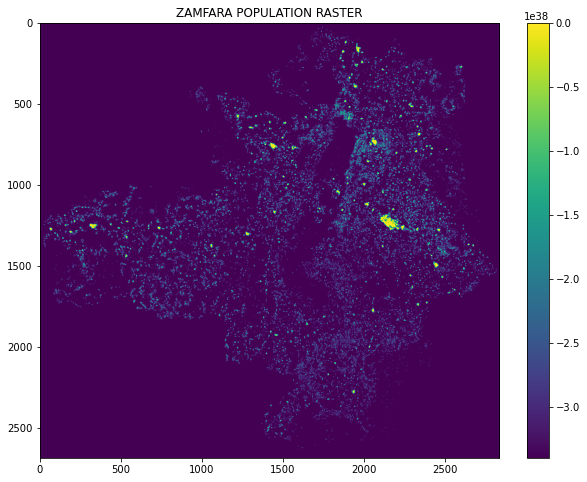

In [35]:
# load in the grided raster population map using rasterio
pop_raster = r"Zamfara_estimated_pop1.tif"

raster = rasterio.open(os.path.join(location, pop_raster))
image = raster.read(1)
# Note GetRasterBand() takes band no. starting from 1 not 0
plt.figure(figsize=(10,8))
plt.imshow(image);
plt.title("ZAMFARA POPULATION RASTER")
plt.colorbar(plt.imshow(image),fraction = 0.05)
plt.savefig(os.path.join(location,"ZAMFARA POPULATION RASTER"))

In [36]:
# Total Estimated Population of Zamfara State from the raster data
pop_zamfara_sum = image[image > 0].sum()
print(f'The total estimated population of Zamfara state is {pop_zamfara_sum}')

The total estimated population of Zamfara state is 4973154.5


In [37]:
# create a function that can be used to calculate zonal statistics
def zonal_stat(imagery,poly):
    """"
    This function is used to compute a sum stat of a raster wihtin a particular polygon
    imagery: Raster image that will be use to compute the stat
    poly: The overlayed boundary whose stat will be computed    
    Return: list contain sum of pixel of the raster within each define poly
    """
    _results = []
    for i in poly["geometry"]:
        aoi = poly[poly["geometry"]== i]

        # using the mask.mask module from Rasterio to specify the ROI
        gtraster, bound = mask.mask(imagery, aoi["geometry"], crop=True) 
        
        # values greater than 0 represent the estimated population count for that pixel
        _results.append(round(gtraster[gtraster > 0].sum()))

    return _results

In [38]:
# Use the 1000m buffer around the health facilities to compute the total estiimated population within the radium of 1km of the clinic
df1 = zonal_stat(raster,buffer_)
buffer_["population"] = df1
buffer_["id"] = reproj_facilities["id"]

In [39]:
# Join the attribute of the clinic to the buffer created around it so as to be able to identify the buffer of each clinic
pop_health_fc = buffer_.merge(reproj_facilities, on ="id")

# drop unwanted columns
pop_health_fc.drop(['global_id',  'alternate_name' ,
       'ward_code', 'accessibility', 'lga_code', 'state_code',], axis = 1, inplace = True)
pop_health_fc.head()

,geometry_x,population,id,name,functional_status,type,category,timestamp,lga_name,state_name,ward_name,geometry_y
0,"POLYGON ((162628.792 1319766.318, 162626.385 1...",379,25725,Makakari Dispensary,Functional,Primary,Dispensary,2019-11-15 17:34:16,Anka,Zamfara,Bagega,POINT (162128.792 1319766.318)
1,"POLYGON ((164271.832 1316990.573, 164269.424 1...",760,25730,Kasunka Dispensary,Unknown,Primary,Dispensary,2019-11-15 17:34:16,Anka,Zamfara,Bagega,POINT (163771.832 1316990.573)
2,"POLYGON ((170375.063 1322145.201, 170372.655 1...",940,25737,Tungar Kudaku Dispensary,Unknown,Primary,Dispensary,2019-11-15 17:34:16,Anka,Zamfara,Bagega,POINT (169875.063 1322145.201)
3,"POLYGON ((177135.612 1308830.204, 177133.204 1...",2416,25748,Kawaye Dispensary,Functional,Primary,Dispensary,2019-11-15 17:34:16,Anka,Zamfara,Bagega,POINT (176635.612 1308830.204)
4,"POLYGON ((182331.638 1317095.631, 182329.230 1...",656,25766,Duza Primary Health Center,Unknown,Primary,Primary Health Center,2018-12-18 10:21:02,Anka,Zamfara,Bagega,POINT (181831.638 1317095.631)


In [40]:
# Top 20 health facilities withinn 500m radium of highly populated area
top_20 = pop_health_fc[["name", 'category',"population","ward_name","lga_name"]].nlargest(20,"population")
top_20

,name,category,population,ward_name,lga_name
247,Sabongari Dispensary,Dispensary,35669,Madawaki,Gusau
248,Kofar Yarima Fixed Post,Primary Health Center,30441,Madawaki,Gusau
430,Shagari Health Clinic,Primary Health Center,30382,Mayana,Gusau
895,Shagari Primary Health Center,Primary Health Center,30025,Galadima,Gusau
431,Kofar Mani Clinic,Primary Health Center,28974,Mayana,Gusau
208,Sabon Gari Primary Health Center,Primary Health Center,23023,Sabon Gari,Gusau
606,Mallamawa Dispensary,Dispensary,21371,Sarkin Mafara-Sarkin Baura,Kaura Namoda
72,Kaida Dispensary,Dispensary,19399,Bungudu,Bungudu
206,Rama Hospital,Primary Health Center,18243,Sabon Gari,Gusau
699,Karima Women and Children Welfare Clinic,Primary Health Center,18143,Tudun Wada,Gusau


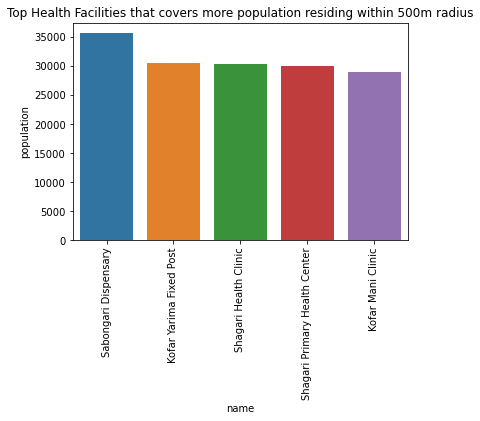

In [41]:
# Top 5 health facilities withinn 500m radium of highly populated area
top_5 = pop_health_fc[["name", 'category',"population","ward_name","lga_name"]].nlargest(5,"population")
ax = sns.barplot(data=top_5,x="name",y="population");
ax.tick_params(axis='x', rotation=90)
ax.set(title ="Top Health Facilities that covers more population residing within 500m radius");
plt.savefig(os.path.join(location,"Top Health Facilities that covers more population residing within 500m radius"))

In [42]:
# 20 health facilities that covers the lowest population within 500m
lowest_20 = pop_health_fc[["name", 'category',"population","ward_name","lga_name"]].nsmallest(20,"population")
lowest_20

,name,category,population,ward_name,lga_name
9,Dankadu Dispensary,Dispensary,0,Yarkofoji,Bakura
111,Surudubu Dispensary,Dispensary,0,Katuru,Shinkafi
123,Kirifada Health Center,Primary Health Center,0,Madomawa East,Birnin Magaji-Kiyaw
235,Danhayin Bawa Health Clinic,Primary Health Center,0,Sabon Birni,Anka
280,Shabiu Dispensary,Dispensary,0,Magaji,Anka
298,Tumfa Health Center,Primary Health Center,0,Boko,Zurmi
302,Rini Health Center,Primary Health Center,0,Dankadu,Bakura
303,Tungan Fadama Dispensary,Dispensary,0,Dankadu,Bakura
309,Runji Health Clinic,Primary Health Center,0,Furfuri Kwaikwai,Bungudu
386,Maitako Dispensary,Dispensary,0,Danmanau,Bakura


Ater uisng the 500m radius buffer to extract the count of population within 500m radius of each facilities, it was noted that some faciltiites have zero population around it which seems imposiiblle, to vertify this we overlaid our health facilities data on a high resolution imagery, from there we were able to see that the points wiht zero population are invalid because the points fall on forest area and faarm lands.

we will remove all the non-existing\invalid points from the data that will be used for the suitablity and health facilities assesment

In [43]:
# join the population data to the reprojected faciltity points
reproj_facilities["Population within 500m radius"] = buffer_["population"]

# we validated the Health facilities by detecting facilities that does not exist in the location
valid_facilities =  reproj_facilities[reproj_facilities["Population within 500m radius"]> 0]

In [44]:
invalid_facilities =  reproj_facilities[reproj_facilities["Population within 500m radius"]== 0]
len (invalid_facilities)

27

In [45]:
# toal number of valid facilitites based
len (valid_facilities)

889

### Health Facilities Suitability Analysis

#### Using Geospatial method to find location that have low access to health care 

Identify the constraint which are; Distance to water bodies, distaince to existing health facilities, non residential area. merge all the layers together as one single vector file (constraint)

In [46]:
# Load the water boies polygon
water_bodies = load_file("water_bodies.geojson",location)

# Load the water way polygon
water_way = load_file("water_way.geojson",location)

# merge the two layer togther
water_body = water_bodies.geometry.append(water_way.geometry)

# convert the layer from WGS84 to UTM
reproj_water = water_body.to_crs(epsg=32632)

# create a buffer of 200m around the merged layer
distance_watebody = reproj_water.geometry.buffer(200)

In [47]:
# Create a buffer of 1000m around the health faciliites
buffer_fac = valid_facilities.geometry.buffer(1000)

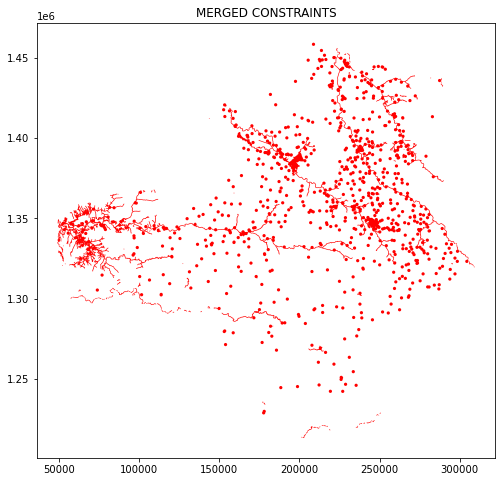

In [48]:
# merge all constraint
merge_constraints = distance_watebody.geometry.append(buffer_fac.geometry)

merge_constraints = gpd.GeoDataFrame(merge_constraints)
merge_constraints.rename(columns={0:"geometry"},inplace=True)

merge_constraints["group"] = 1
merged_constraint = merge_constraints.dissolve(by="group")
merged_constraint.plot(figsize=(10,8), color ="red")
plt.title("MERGED CONSTRAINTS")
plt.savefig(os.path.join(location," MERGED CONSTRAINTS"))

Identify the most important factors; distance to road network, residential area, Distance to settlement center. Merge all the layers together as one single vector file (factors)

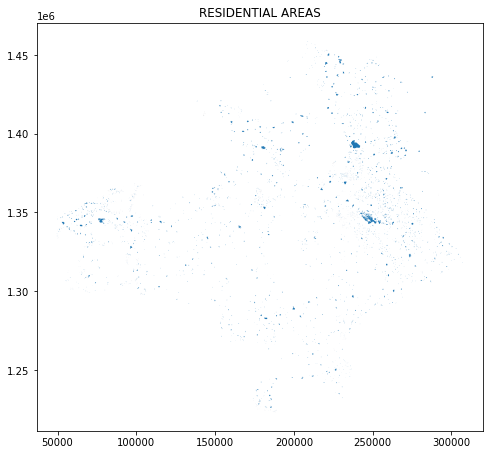

In [49]:
residential_area = load_file("residential_area.geojson",location) # Load the residential area polygon

# reprojec the residential layer file to UTM
residential_area.to_crs(epsg=32632,inplace=True)

residential_area.plot(figsize=(8,8));
plt.title("RESIDENTIAL AREAS")
plt.savefig(os.path.join(location,"RESIDENTIAL AREAS"))

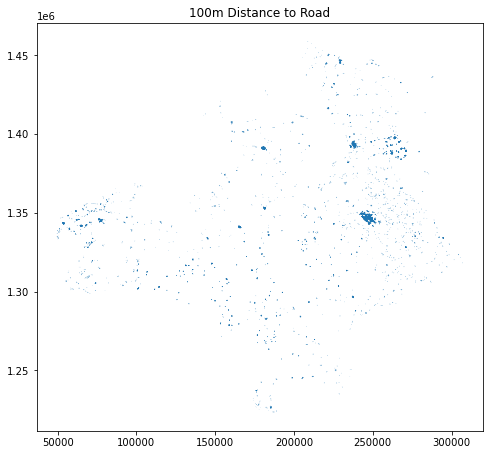

In [50]:
road = load_file("road_network.geojson",location) # Load the road polylines

# reporjectthe data to UTM
road.to_crs(epsg=32632,inplace=True)

# Extract Residential road
res_road = gpd.clip(road,residential_area, keep_geom_type=True)

# create buffer of 1km around the road polylines
road_dist = res_road.geometry.buffer(100)

dist_2_road = gpd.GeoDataFrame(road_dist)
dist_2_road.rename(columns={0:"geometry"},inplace=True)

dist_2_road.plot(figsize=(8,8))

plt.title("100m Distance to Road")
plt.savefig(os.path.join(location,"100m_dist_2_road"))

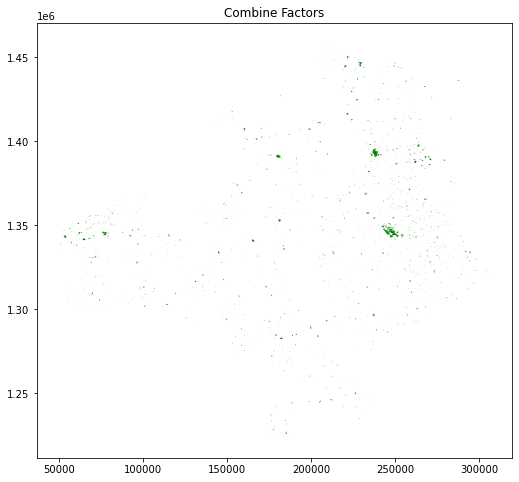

In [51]:
combine_factors  = gpd.overlay(residential_area,dist_2_road, how="intersection")
combine_factors["group"] = 1
merged_factors = combine_factors.dissolve(by="group")
merged_factors.plot(figsize=(10,8),color ="green");
plt.title("Combine Factors")
plt.savefig(os.path.join(location,"COMBINED FACTORS"))

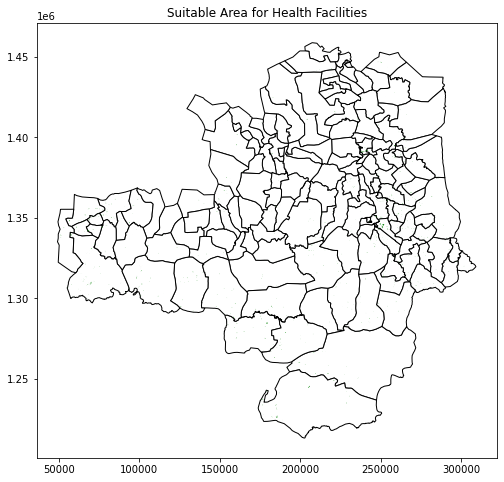

In [52]:
# # convert the result of the constraint and factors to geodataframe
# # convert merged factor to geodataframe
# gdf1 = gpd.GeoDataFrame(merged_factors)
# gdf1.rename(columns={0:"geometry"},inplace=True)
# gdf1.to_crs(epsg=32632, inplace=True)

# # convert merged constriant to geodataframe
# gdf2 = gpd.GeoDataFrame(merged_constraint)
# gdf2.rename(columns={0:"geometry"},inplace=True)
# gdf2.to_crs(epsg=32632, inplace=True)

# overlay the two layer and erase the factors location that are overlaid by constraint to get the health facilities low coverage locations
suitable_area = gpd.overlay(merged_factors,merged_constraint, how="difference")

# add ward polygon boundary
ward = load_file("ward.geojson",location)
ward.to_crs(epsg=32632,inplace=True)

# plot the differerence layer on the wad shapefile
ax = ward.plot(color="white", edgecolor="black", figsize=(10,8))
suitable_area.plot(color = "green", ax = ax);
plt.title("Suitable Area for Health Facilities")
plt.savefig(os.path.join(location,"Suitable Area for Health Facilities"))

### Using the poulation dataset, residential Area, and Constraintextract location and population with low to no access to health care

In [53]:
# erase part of the residential area with the constraint polygon
low_coverage_loc = gpd.overlay(residential_area,merged_constraint, how="difference")

# Add a new column to the polygon, this column will be used to dissolve all the polygon into one
low_coverage_loc["group"] = 1
dissolved = low_coverage_loc.dissolve(by="group")
dissolved.reset_index(inplace=True)
dissolved.drop("group", axis=1,inplace=True)

low_coverage = dissolved.explode(index_parts=False)

In [54]:
# use the exploded polygon coverage shapefile to extract the total population within the low coverage area 
coverage = zonal_stat(raster,low_coverage)

# assign the population generated to a new columns
low_coverage["Pop with low access to healthcare"] = coverage

low_coverage

,osm_id,code,fclass,name,geometry,Pop with low access to healthcare
0,282609032,7203,residential,Uni,"POLYGON ((188168.901 1223228.929, 188193.474 1...",0
0,282609032,7203,residential,Uni,"POLYGON ((187322.764 1223348.068, 187333.817 1...",24
0,282609032,7203,residential,Uni,"POLYGON ((188175.805 1223378.076, 188183.413 1...",0
0,282609032,7203,residential,Uni,"POLYGON ((188156.208 1223303.801, 188159.711 1...",0
0,282609032,7203,residential,Uni,"POLYGON ((186645.433 1223443.843, 186647.732 1...",0
...,...,...,...,...,...,...
0,282609032,7203,residential,Uni,"POLYGON ((87199.381 1349707.727, 87199.616 134...",0
0,282609032,7203,residential,Uni,"POLYGON ((236853.320 1349718.111, 236873.436 1...",42
0,282609032,7203,residential,Uni,"POLYGON ((253453.586 1349715.349, 253471.847 1...",10
0,282609032,7203,residential,Uni,"POLYGON ((99572.011 1349678.179, 99583.024 134...",0


 ### Our coverage area shows that some location withiout access to health facilities have low population counts, therefore we will only select location with > 1000 population as the locations that need urgent health attention

In [55]:
# select low coverage ara with greether than 1000 population
greater_than_1000 = low_coverage[low_coverage["Pop with low access to healthcare"] > 1000].sort_values(by ="Pop with low access to healthcare",axis = 0, ascending = False)
greater_than_1000.head(10)

,osm_id,code,fclass,name,geometry,Pop with low access to healthcare
0,282609032,7203,residential,Uni,"POLYGON ((249743.825 1346779.341, 249769.686 1...",9327
0,282609032,7203,residential,Uni,"POLYGON ((219809.312 1439428.552, 219892.526 1...",6331
0,282609032,7203,residential,Uni,"POLYGON ((178798.537 1284581.979, 178820.939 1...",4458
0,282609032,7203,residential,Uni,"POLYGON ((159891.813 1275431.284, 159934.000 1...",3893
0,282609032,7203,residential,Uni,"POLYGON ((186017.077 1373315.926, 186040.400 1...",3884
0,282609032,7203,residential,Uni,"POLYGON ((251079.255 1345511.846, 251102.644 1...",3522
0,282609032,7203,residential,Uni,"POLYGON ((231634.166 1368980.270, 231672.002 1...",3360
0,282609032,7203,residential,Uni,"POLYGON ((262883.094 1343866.605, 262882.286 1...",3188
0,282609032,7203,residential,Uni,"POLYGON ((268470.435 1365605.274, 268481.167 1...",2897
0,282609032,7203,residential,Uni,"POLYGON ((203898.846 1411442.903, 203968.820 1...",2614


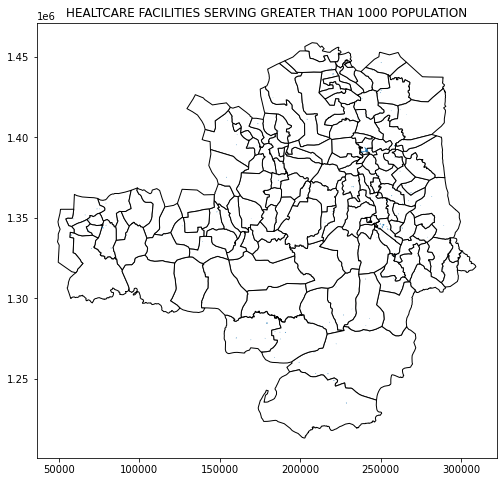

In [56]:
ax = ward.plot(color="white", edgecolor="black", figsize=(10,8))
greater_than_1000.plot(ax=ax);
plt.title("HEALTCARE FACILITIES SERVING GREATER THAN 1000 POPULATION")
plt.savefig(os.path.join(location,"GREATER THAN 1000 POPULATION"))

<!-- ### Select the best location to site an Health center

The best location to site an health center will be the centroid of the low covereage area polygon -->

In [57]:
reproj_facilities.columns

Index(['id', 'name', 'global_id', 'alternate_name', 'functional_status',
       'type', 'ward_code', 'category', 'timestamp', 'accessibility',
       'lga_name', 'lga_code', 'state_code', 'state_name', 'ward_name',
       'geometry', 'Population within 500m radius'],
      dtype='object')

In [58]:
reproj_facilities.drop(['global_id', 'alternate_name', 
       'type', 'ward_code', 'timestamp', 'accessibility',
        'lga_code', 'state_code'], axis=1, inplace= True)
reproj_facilities.nlargest(10, 'Population within 500m radius')

,id,name,functional_status,category,lga_name,state_name,ward_name,geometry,Population within 500m radius
247,8406,Sabongari Dispensary,Functional,Dispensary,Gusau,Zamfara,Madawaki,POINT (245596.703 1345950.627),35669
248,8407,Kofar Yarima Fixed Post,Functional,Primary Health Center,Gusau,Zamfara,Madawaki,POINT (245804.115 1345960.304),30441
430,8419,Shagari Health Clinic,Functional,Primary Health Center,Gusau,Zamfara,Mayana,POINT (245440.637 1345452.218),30382
895,26365,Shagari Primary Health Center,Functional,Primary Health Center,Gusau,Zamfara,Galadima,POINT (245236.324 1346243.663),30025
431,8456,Kofar Mani Clinic,Functional,Primary Health Center,Gusau,Zamfara,Mayana,POINT (245027.269 1345859.456),28974
208,26581,Sabon Gari Primary Health Center,Functional,Primary Health Center,Gusau,Zamfara,Sabon Gari,POINT (246019.393 1346001.111),23023
606,26386,Mallamawa Dispensary,Functional,Dispensary,Kaura Namoda,Zamfara,Sarkin Mafara-Sarkin Baura,POINT (237077.102 1393662.227),21371
72,25913,Kaida Dispensary,Unknown,Dispensary,Bungudu,Zamfara,Bungudu,POINT (233660.497 1357304.489),19399
206,8459,Rama Hospital,Functional,Primary Health Center,Gusau,Zamfara,Sabon Gari,POINT (245963.724 1346372.660),18243
699,37202,Karima Women and Children Welfare Clinic,Functional,Primary Health Center,Gusau,Zamfara,Tudun Wada,POINT (247802.402 1345824.591),18143


In [59]:
# Export the shapefile showing locations with low access to health centers
suitable_area.to_file(os.path.join(location,"suitable.geojson"),driver ="GeoJSON")
greater_than_1000.to_file(os.path.join(location,"greater_than_1000.geojson"),driver ="GeoJSON")
reproj_facilities.to_file(os.path.join(location,"eHealth_health_facilities"),driver ="GeoJSON")
valid_facilities.to_file(os.path.join(location,"validated_health_facilities"),driver ="GeoJSON")